In [31]:
import pandas as pd
from datetime import datetime
import numpy as np
import requests
from datetime import datetime, timedelta
from io import BytesIO
import pdfplumber

In [32]:
def get_data(pdf_url):
    data = pdf_url.split('/')[7].split('.')[0] + '-' + pdf_url.split('/')[6] + '-' + pdf_url.split('/')[5]
    return datetime.strptime(data, "%d-%m-%Y")

In [33]:
def new_pdf(date):
    if date.day > 9:
        if date.month > 9:
            return f'http://www.sde.ba.gov.br/wp-content/uploads/{date.year}/{date.month}/{date.day}.{date.month}.{date.year}.pdf'
        return f'http://www.sde.ba.gov.br/wp-content/uploads/{date.year}/0{date.month}/{date.day}.0{date.month}.{date.year}.pdf'
    
    if date.month > 9:
        return f'http://www.sde.ba.gov.br/wp-content/uploads/{date.year}/{date.month}/0{date.day}.{date.month}.{date.year}.pdf'
    
    return f'http://www.sde.ba.gov.br/wp-content/uploads/{date.year}/0{date.month}/0{date.day}.0{date.month}.{date.year}.pdf'

In [34]:
def get_pdf(pdf_url):
    try:
        response = requests.get(pdf_url)
        response.raise_for_status()  # Verificar se a requisição foi bem-sucedida
        pdf_file = BytesIO(response.content)
        
        texto = ''
    
        with pdfplumber.open(pdf_file) as pdf:

            for page_number, page in enumerate(pdf.pages):
                texto_novo = page.extract_text()
                texto = texto + texto_novo
                
        return texto
    except requests.exceptions.Timeout:
        print('A requisição demorou muito para responder.')
    except requests.exceptions.RequestException as e:
        print(f'Erro ao fazer a requisição: {e}')
    except Exception as e:
        print(f'Outro erro ocorreu: {e}')

In [35]:
def get_series(df, produto, data_final):
    series = {
        'Produto':produto,
        'Data':
        'Preco':
    }
    data_inicial = datetime.now()
    data_atual = data_inicial
    
    while data_atual > data_final:
        print(data_atual.strftime("%Y-%m-%d"))
        
        # Supondo que new_pdf e get_pdf são funções definidas em outro lugar
        texto = get_pdf(new_pdf(data_atual))
        
        # Verificar se texto não é None
        if texto is None or '404 Client Error' in texto:
            data_atual -= timedelta(days=1)
            continue
        
        # Supondo que linhas é uma lista de strings obtida do texto
        linhas = texto.split('\n')
        
        for linha in linhas:
            if produto in linha:
                series.append(linha)
        
        data_atual -= timedelta(days=1)
    
    return series

# Data final para a iteração
data_final = datetime.strptime("10-07-2024", "%d-%m-%Y")

# Chamar a função (df deve ser um DataFrame definido em outro lugar)
resultado = get_series(df, 'PINHA', data_final)
print(resultado)


SyntaxError: invalid syntax (3441955023.py, line 5)

In [36]:
from datetime import datetime, timedelta

def get_series(produto, data_final):
    
    erro = 0
    
    series = {
        'Produto': [],
        'Data': [],
        'Preco': []
    }
    data_atual = datetime.now()

    while data_atual > data_final:
        print(data_atual.strftime("%Y-%m-%d"))
        
        data_formatada = data_atual.strftime("%Y-%m-%d")
        
        # Supondo que new_pdf e get_pdf são funções definidas em outro lugar
        texto = get_pdf(new_pdf(data_atual))

        # Verificar se texto não é None
        if texto is None or '404 Client Error' in texto:
            erro += 1
            
            if erro == 100:
                break
            
            data_atual -= timedelta(days=1)
            continue

        # Supondo que linhas é uma lista de strings obtida do texto
        linhas = texto.split('\n')

        for linha in linhas:
            if produto in linha:
                # Extraindo a data e o preço da linha
                preco_str = linha.split()[4]  # Ajuste conforme o formato real da linha
                series['Produto'].append(linha.split(' ')[0])
                series['Data'].append(data_formatada)
                series['Preco'].append(preco_str)

        data_atual -= timedelta(days=1)
        
        erro = 0

    return series

In [54]:
# Data final para a iteração
data_final = datetime.strptime("01-06-2019", "%d-%m-%Y")

# Chamar a função (df deve ser um DataFrame definido em outro lugar)
resultado = get_series('PINHA', data_final)
print(resultado)

2024-08-08
Erro ao fazer a requisição: 404 Client Error: Not Found for url: http://www.sde.ba.gov.br/wp-content/uploads/2024/08/08.08.2024.pdf
2024-08-07
2024-08-06
Erro ao fazer a requisição: 404 Client Error: Not Found for url: http://www.sde.ba.gov.br/wp-content/uploads/2024/08/06.08.2024.pdf
2024-08-05
2024-08-04
Erro ao fazer a requisição: 404 Client Error: Not Found for url: http://www.sde.ba.gov.br/wp-content/uploads/2024/08/04.08.2024.pdf
2024-08-03
Erro ao fazer a requisição: 404 Client Error: Not Found for url: http://www.sde.ba.gov.br/wp-content/uploads/2024/08/03.08.2024.pdf
2024-08-02
2024-08-01
Erro ao fazer a requisição: 404 Client Error: Not Found for url: http://www.sde.ba.gov.br/wp-content/uploads/2024/08/01.08.2024.pdf
2024-07-31
2024-07-30
Erro ao fazer a requisição: 404 Client Error: Not Found for url: http://www.sde.ba.gov.br/wp-content/uploads/2024/07/30.07.2024.pdf
2024-07-29
2024-07-28
Erro ao fazer a requisição: 404 Client Error: Not Found for url: http://www.

2024-05-07
Erro ao fazer a requisição: 404 Client Error: Not Found for url: http://www.sde.ba.gov.br/wp-content/uploads/2024/05/07.05.2024.pdf
2024-05-06
Erro ao fazer a requisição: 404 Client Error: Not Found for url: http://www.sde.ba.gov.br/wp-content/uploads/2024/05/06.05.2024.pdf
2024-05-05
Erro ao fazer a requisição: 404 Client Error: Not Found for url: http://www.sde.ba.gov.br/wp-content/uploads/2024/05/05.05.2024.pdf
2024-05-04
Erro ao fazer a requisição: 404 Client Error: Not Found for url: http://www.sde.ba.gov.br/wp-content/uploads/2024/05/04.05.2024.pdf
2024-05-03
2024-05-02
Erro ao fazer a requisição: 404 Client Error: Not Found for url: http://www.sde.ba.gov.br/wp-content/uploads/2024/05/02.05.2024.pdf
2024-05-01
Erro ao fazer a requisição: 404 Client Error: Not Found for url: http://www.sde.ba.gov.br/wp-content/uploads/2024/05/01.05.2024.pdf
2024-04-30
Erro ao fazer a requisição: 404 Client Error: Not Found for url: http://www.sde.ba.gov.br/wp-content/uploads/2024/04/30.

Erro ao fazer a requisição: 404 Client Error: Not Found for url: http://www.sde.ba.gov.br/wp-content/uploads/2024/02/11.02.2024.pdf
2024-02-10
Erro ao fazer a requisição: 404 Client Error: Not Found for url: http://www.sde.ba.gov.br/wp-content/uploads/2024/02/10.02.2024.pdf
2024-02-09
Erro ao fazer a requisição: 404 Client Error: Not Found for url: http://www.sde.ba.gov.br/wp-content/uploads/2024/02/09.02.2024.pdf
2024-02-08
Erro ao fazer a requisição: 404 Client Error: Not Found for url: http://www.sde.ba.gov.br/wp-content/uploads/2024/02/08.02.2024.pdf
2024-02-07
Erro ao fazer a requisição: 404 Client Error: Not Found for url: http://www.sde.ba.gov.br/wp-content/uploads/2024/02/07.02.2024.pdf
2024-02-06
Erro ao fazer a requisição: 404 Client Error: Not Found for url: http://www.sde.ba.gov.br/wp-content/uploads/2024/02/06.02.2024.pdf
2024-02-05
Erro ao fazer a requisição: 404 Client Error: Not Found for url: http://www.sde.ba.gov.br/wp-content/uploads/2024/02/05.02.2024.pdf
2024-02-04

2023-11-23
Erro ao fazer a requisição: 404 Client Error: Not Found for url: http://www.sde.ba.gov.br/wp-content/uploads/2023/11/23.11.2023.pdf
2023-11-22
Erro ao fazer a requisição: 404 Client Error: Not Found for url: http://www.sde.ba.gov.br/wp-content/uploads/2023/11/22.11.2023.pdf
2023-11-21
Erro ao fazer a requisição: 404 Client Error: Not Found for url: http://www.sde.ba.gov.br/wp-content/uploads/2023/11/21.11.2023.pdf
2023-11-20
2023-11-19
Erro ao fazer a requisição: 404 Client Error: Not Found for url: http://www.sde.ba.gov.br/wp-content/uploads/2023/11/19.11.2023.pdf
2023-11-18
Erro ao fazer a requisição: 404 Client Error: Not Found for url: http://www.sde.ba.gov.br/wp-content/uploads/2023/11/18.11.2023.pdf
2023-11-17
2023-11-16
Erro ao fazer a requisição: 404 Client Error: Not Found for url: http://www.sde.ba.gov.br/wp-content/uploads/2023/11/16.11.2023.pdf
2023-11-15
Erro ao fazer a requisição: 404 Client Error: Not Found for url: http://www.sde.ba.gov.br/wp-content/uploads/

Erro ao fazer a requisição: 404 Client Error: Not Found for url: http://www.sde.ba.gov.br/wp-content/uploads/2023/09/02.09.2023.pdf
2023-09-01
2023-08-31
Erro ao fazer a requisição: 404 Client Error: Not Found for url: http://www.sde.ba.gov.br/wp-content/uploads/2023/08/31.08.2023.pdf
2023-08-30
2023-08-29
Erro ao fazer a requisição: 404 Client Error: Not Found for url: http://www.sde.ba.gov.br/wp-content/uploads/2023/08/29.08.2023.pdf
2023-08-28
2023-08-27
Erro ao fazer a requisição: 404 Client Error: Not Found for url: http://www.sde.ba.gov.br/wp-content/uploads/2023/08/27.08.2023.pdf
2023-08-26
Erro ao fazer a requisição: 404 Client Error: Not Found for url: http://www.sde.ba.gov.br/wp-content/uploads/2023/08/26.08.2023.pdf
2023-08-25
2023-08-24
Erro ao fazer a requisição: 404 Client Error: Not Found for url: http://www.sde.ba.gov.br/wp-content/uploads/2023/08/24.08.2023.pdf
2023-08-23
2023-08-22
Erro ao fazer a requisição: 404 Client Error: Not Found for url: http://www.sde.ba.gov.

Erro ao fazer a requisição: 404 Client Error: Not Found for url: http://www.sde.ba.gov.br/wp-content/uploads/2023/06/03.06.2023.pdf
2023-06-02
Erro ao fazer a requisição: 404 Client Error: Not Found for url: http://www.sde.ba.gov.br/wp-content/uploads/2023/06/02.06.2023.pdf
2023-06-01
Erro ao fazer a requisição: 404 Client Error: Not Found for url: http://www.sde.ba.gov.br/wp-content/uploads/2023/06/01.06.2023.pdf
2023-05-31
2023-05-30
Erro ao fazer a requisição: 404 Client Error: Not Found for url: http://www.sde.ba.gov.br/wp-content/uploads/2023/05/30.05.2023.pdf
2023-05-29
2023-05-28
Erro ao fazer a requisição: 404 Client Error: Not Found for url: http://www.sde.ba.gov.br/wp-content/uploads/2023/05/28.05.2023.pdf
2023-05-27
Erro ao fazer a requisição: 404 Client Error: Not Found for url: http://www.sde.ba.gov.br/wp-content/uploads/2023/05/27.05.2023.pdf
2023-05-26
2023-05-25
Erro ao fazer a requisição: 404 Client Error: Not Found for url: http://www.sde.ba.gov.br/wp-content/uploads/

Erro ao fazer a requisição: 404 Client Error: Not Found for url: http://www.sde.ba.gov.br/wp-content/uploads/2023/03/11.03.2023.pdf
2023-03-10
2023-03-09
Erro ao fazer a requisição: 404 Client Error: Not Found for url: http://www.sde.ba.gov.br/wp-content/uploads/2023/03/09.03.2023.pdf
2023-03-08
2023-03-07
Erro ao fazer a requisição: 404 Client Error: Not Found for url: http://www.sde.ba.gov.br/wp-content/uploads/2023/03/07.03.2023.pdf
2023-03-06
2023-03-05
Erro ao fazer a requisição: 404 Client Error: Not Found for url: http://www.sde.ba.gov.br/wp-content/uploads/2023/03/05.03.2023.pdf
2023-03-04
Erro ao fazer a requisição: 404 Client Error: Not Found for url: http://www.sde.ba.gov.br/wp-content/uploads/2023/03/04.03.2023.pdf
2023-03-03
2023-03-02
Erro ao fazer a requisição: 404 Client Error: Not Found for url: http://www.sde.ba.gov.br/wp-content/uploads/2023/03/02.03.2023.pdf
2023-03-01
2023-02-28
Erro ao fazer a requisição: 404 Client Error: Not Found for url: http://www.sde.ba.gov.

2022-12-22
Erro ao fazer a requisição: 404 Client Error: Not Found for url: http://www.sde.ba.gov.br/wp-content/uploads/2022/12/22.12.2022.pdf
2022-12-21
2022-12-20
Erro ao fazer a requisição: 404 Client Error: Not Found for url: http://www.sde.ba.gov.br/wp-content/uploads/2022/12/20.12.2022.pdf
2022-12-19
Erro ao fazer a requisição: 404 Client Error: Not Found for url: http://www.sde.ba.gov.br/wp-content/uploads/2022/12/19.12.2022.pdf
2022-12-18
Erro ao fazer a requisição: 404 Client Error: Not Found for url: http://www.sde.ba.gov.br/wp-content/uploads/2022/12/18.12.2022.pdf
2022-12-17
Erro ao fazer a requisição: 404 Client Error: Not Found for url: http://www.sde.ba.gov.br/wp-content/uploads/2022/12/17.12.2022.pdf
2022-12-16
Erro ao fazer a requisição: 404 Client Error: Not Found for url: http://www.sde.ba.gov.br/wp-content/uploads/2022/12/16.12.2022.pdf
2022-12-15
Erro ao fazer a requisição: 404 Client Error: Not Found for url: http://www.sde.ba.gov.br/wp-content/uploads/2022/12/15.

Erro ao fazer a requisição: 404 Client Error: Not Found for url: http://www.sde.ba.gov.br/wp-content/uploads/2022/10/02.10.2022.pdf
2022-10-01
Erro ao fazer a requisição: 404 Client Error: Not Found for url: http://www.sde.ba.gov.br/wp-content/uploads/2022/10/01.10.2022.pdf
2022-09-30
Erro ao fazer a requisição: 404 Client Error: Not Found for url: http://www.sde.ba.gov.br/wp-content/uploads/2022/09/30.09.2022.pdf
2022-09-29
Erro ao fazer a requisição: 404 Client Error: Not Found for url: http://www.sde.ba.gov.br/wp-content/uploads/2022/09/29.09.2022.pdf
2022-09-28
Erro ao fazer a requisição: 404 Client Error: Not Found for url: http://www.sde.ba.gov.br/wp-content/uploads/2022/09/28.09.2022.pdf
2022-09-27
Erro ao fazer a requisição: 404 Client Error: Not Found for url: http://www.sde.ba.gov.br/wp-content/uploads/2022/09/27.09.2022.pdf
2022-09-26
Erro ao fazer a requisição: 404 Client Error: Not Found for url: http://www.sde.ba.gov.br/wp-content/uploads/2022/09/26.09.2022.pdf
2022-09-25

2022-07-19
Erro ao fazer a requisição: 404 Client Error: Not Found for url: http://www.sde.ba.gov.br/wp-content/uploads/2022/07/19.07.2022.pdf
2022-07-18
2022-07-17
Erro ao fazer a requisição: 404 Client Error: Not Found for url: http://www.sde.ba.gov.br/wp-content/uploads/2022/07/17.07.2022.pdf
2022-07-16
Erro ao fazer a requisição: 404 Client Error: Not Found for url: http://www.sde.ba.gov.br/wp-content/uploads/2022/07/16.07.2022.pdf
2022-07-15
2022-07-14
Erro ao fazer a requisição: 404 Client Error: Not Found for url: http://www.sde.ba.gov.br/wp-content/uploads/2022/07/14.07.2022.pdf
2022-07-13
2022-07-12
Erro ao fazer a requisição: 404 Client Error: Not Found for url: http://www.sde.ba.gov.br/wp-content/uploads/2022/07/12.07.2022.pdf
2022-07-11
Erro ao fazer a requisição: 404 Client Error: Not Found for url: http://www.sde.ba.gov.br/wp-content/uploads/2022/07/11.07.2022.pdf
2022-07-10
Erro ao fazer a requisição: 404 Client Error: Not Found for url: http://www.sde.ba.gov.br/wp-conte

Erro ao fazer a requisição: 404 Client Error: Not Found for url: http://www.sde.ba.gov.br/wp-content/uploads/2022/05/20.05.2022.pdf
2022-05-19
Erro ao fazer a requisição: 404 Client Error: Not Found for url: http://www.sde.ba.gov.br/wp-content/uploads/2022/05/19.05.2022.pdf
2022-05-18
Erro ao fazer a requisição: 404 Client Error: Not Found for url: http://www.sde.ba.gov.br/wp-content/uploads/2022/05/18.05.2022.pdf
2022-05-17
Erro ao fazer a requisição: 404 Client Error: Not Found for url: http://www.sde.ba.gov.br/wp-content/uploads/2022/05/17.05.2022.pdf
2022-05-16
Erro ao fazer a requisição: 404 Client Error: Not Found for url: http://www.sde.ba.gov.br/wp-content/uploads/2022/05/16.05.2022.pdf
2022-05-15
Erro ao fazer a requisição: 404 Client Error: Not Found for url: http://www.sde.ba.gov.br/wp-content/uploads/2022/05/15.05.2022.pdf
2022-05-14
Erro ao fazer a requisição: 404 Client Error: Not Found for url: http://www.sde.ba.gov.br/wp-content/uploads/2022/05/14.05.2022.pdf
2022-05-13

In [55]:
resultado

{'Produto': ['PINHA',
  'PINHA',
  'PINHA',
  'PINHA',
  'PINHA',
  'PINHA',
  'PINHA',
  'PINHA',
  'PINHA',
  'PINHA',
  'PINHA',
  'PINHA',
  'PINHA',
  'PINHA',
  'PINHA',
  'PINHA',
  'PINHA',
  'PINHA',
  'PINHA',
  'PINHA',
  'PINHA',
  'PINHA',
  'PINHA',
  'PINHA',
  'PINHA',
  'PINHA',
  'PINHA',
  'PINHA',
  'PINHA',
  'PINHA',
  'PINHA',
  'PINHA',
  'PINHA',
  'PINHA',
  'PINHA',
  'PINHA',
  'PINHA',
  'PINHA',
  'PINHA',
  'PINHA',
  'PINHA',
  'PINHA',
  'PINHA',
  'PINHA',
  'PINHA',
  'PINHA',
  'PINHA',
  'PINHA',
  'PINHA',
  'PINHA',
  'PINHA',
  'PINHA',
  'PINHA',
  'PINHA',
  'PINHA',
  'PINHA',
  'PINHA',
  'PINHA',
  'PINHA',
  'PINHA',
  'PINHA',
  'PINHA',
  'PINHA',
  'PINHA',
  'PINHA',
  'PINHA',
  'PINHA',
  'PINHA',
  'PINHA',
  'PINHA',
  'PINHA',
  'PINHA',
  'PINHA',
  'PINHA',
  'PINHA',
  'PINHA',
  'PINHA',
  'PINHA',
  'PINHA',
  'PINHA',
  'PINHA',
  'PINHA',
  'PINHA',
  'PINHA',
  'PINHA',
  'PINHA',
  'PINHA',
  'PINHA',
  'PINHA',
  'PINHA',

In [58]:
def dict_to_dataframe(data_dict):
    # Criar DataFrame a partir do dicionário
    df = pd.DataFrame(data_dict)
    
    return df

In [59]:
df = dict_to_dataframe(resultado)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Produto  244 non-null    object
 1   Data     244 non-null    object
 2   Preco    244 non-null    object
dtypes: object(3)
memory usage: 5.8+ KB


In [60]:
df

,Produto,Data,Preco
0,PINHA,2024-08-07,"140,00"
1,PINHA,2024-08-05,"170,00"
2,PINHA,2024-08-02,"160,00"
3,PINHA,2024-07-31,"160,00"
4,PINHA,2024-07-29,"160,00"
...,...,...,...
239,PINHA,2022-07-29,"110,00"
240,PINHA,2022-07-20,"110,00"
241,PINHA,2022-07-18,"110,00"
242,PINHA,2022-07-15,"110,00"


In [81]:
df.to_csv('data.csv', index=False)

In [61]:
# Substitua vírgulas por pontos
df['Preco'] = df['Preco'].str.replace(',', '.')

# Converta a coluna para numérico
df['Preco'] = pd.to_numeric(df['Preco'])

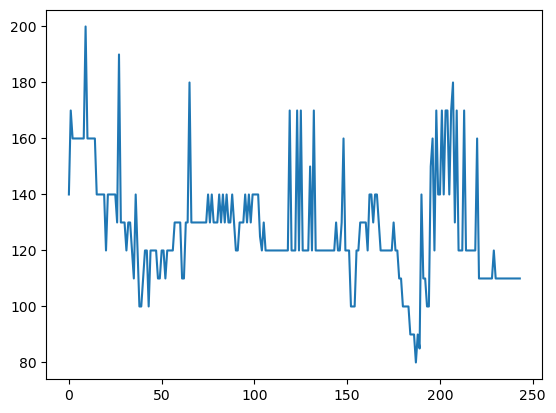

In [62]:
import matplotlib.pyplot as plt

plt.plot(df['Preco'])

In [63]:
# Prepare the data for Prophet
df_prophet = df[['Data', 'Preco']]
df_prophet.columns = ['ds', 'y']  # Rename the columns to 'ds' and 'y'
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'])  # Ensure the date is in datetime format

# Initialize and fit the Prophet model
model = Prophet()
model.fit(df_prophet)

# Make a future dataframe for prediction
future = model.make_future_dataframe(periods=30)  # Predicting for the next 30 days

# Predict future prices
forecast = model.predict(future)

C:\Users\otpok\AppData\Local\Temp\ipykernel_22240\2513628401.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prophet['ds'] = pd.to_datetime(df_prophet['ds'])  # Ensure the date is in datetime format
21:39:46 - cmdstanpy - INFO - Chain [1] start processing
21:39:46 - cmdstanpy - INFO - Chain [1] done processing


In [82]:
forecast.to_csv('predict.csv', index=False)

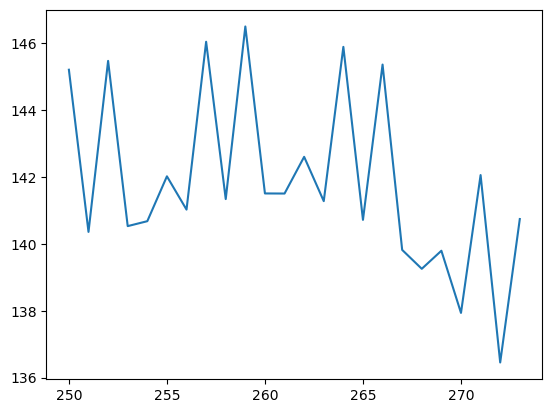

In [83]:
plt.plot(forecast[['ds', 'yhat']][250:]['yhat'])

In [46]:
from scipy import stats

def simpleCS(x, trend_type = "l"):
    n0 = len(x)%2
    if n0 == 1:
        remover = int((len(x))/2)
        x = np.delete(x, int((len(x))/2))
        
    half = len(x)/2
    
    x1 = x[np.arange(0, half, dtype=int)]
    x2 = x[np.arange(half, len(x), dtype=int)]
    
    n = np.sum((x2 - x1) != 0)
    t = np.sum(x1 < x2)
    
    if trend_type == "l":
        pvalue = stats.binom.cdf(t, n, 0.5)
    else:
        pvalue = 1 - stats.binom.cdf(t - 1, n, 0.5)
    
    return pvalue

x = df['Preco']
simpleCS(x, trend_type='l')

ValueError: Can only compare identically-labeled Series objects

In [ ]:
no_trend_x = np.diff(x)

def simpleKW(y, freq = 10):    
    Rank = np.array(pd.Series(y).rank(method='average', na_option='keep'))
    extra = freq - len(Rank)%freq
    dat = np.concatenate((np.repeat(np.nan, extra), Rank))
    yMAT = dat.reshape((int(len(dat)/freq), freq))
    Nobs = np.apply_along_axis(lambda x: np.count_nonzero(~np.isnan(x)), 0, yMAT)
    R2n = np.power(np.apply_along_axis(np.nansum, 0, yMAT), 2)/Nobs
    H = 12/(sum(Nobs) * (sum(Nobs) + 1)) * sum(R2n) - 3 * (sum(Nobs) + 1)

    if sum(np.unique(Rank, return_counts=True)[1]>1) > 0:
        valor = np.unique(Rank, return_counts=True)[1]
        valor = valor[valor > 1]
        sumT = sum(np.power(valor, 3) - valor)
        Correction = 1 - sumT/(np.power(len(y),3) - len(y))
        H = H/Correction

    return 1 - stats.chi2.cdf(H, freq-1)

simpleKW(no_trend_x)

In [ ]:
for i in range(200):
    if simpleKW(no_trend_x, i + 1) < 0.05:
        print(i + 1, simpleKW(no_trend_x, i + 1))